# Air Quality Prediction Model by LSTM and Facebook's Prophet tool

***Loading and Exploring Data***

In [102]:
import zipfile
import pandas as pd
import os
print(os.listdir(r'C:\Users\ZenBook\Downloads\PREDICT'))
# Provide the path to the zip file and the extraction target directory
#zip_file_path = r'C:\Users\ZenBook\Downloads\PREDICT\air_quality.zip'
extraction_path = r'C:\Users\ZenBook\Downloads\PREDICT'

# Unzip the downloaded file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extraction_path)

# Remove the zip file after extraction to clean up
# os.remove(zip_file_path)

# Now, assuming the CSV file is named 'Car_sales.csv' and is in the extracted directory,
# let's read the CSV file into a pandas DataFrame
csv_file_path = os.path.join(extraction_path, 'air-quality-india.csv')
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
df.head()

['Air Quality Data in India', 'air-quality-india.csv', 'ann-car-sales-price-prediction', 'CIFAR', 'CIFAR.zip', 'LULC_PREDICTION.ipynb', 'P74-Project-1', 'P74-Project-1.zip', 'P74-Project-4.zip', 'P74-Project-5.zip', 'P74-Project-6.zip', 'Project 4 - Avocado Prices Prediction', 'Project 6 - Spam Classifier using Naive Bayes']


,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [103]:
df.describe()

,Year,Month,Day,Hour,PM2.5
count,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2019.682278,6.331841,15.716401,11.477840,49.308429
std,1.345011,3.593321,8.859769,6.925088,24.863511
min,2017.000000,1.000000,1.000000,0.000000,7.020000
25%,2019.000000,3.000000,8.000000,5.000000,28.080000
50%,2020.000000,6.000000,16.000000,11.000000,45.730000
75%,2021.000000,10.000000,23.000000,17.000000,64.520000
max,2022.000000,12.000000,31.000000,23.000000,245.630000


***Importing and Preprocessing***


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [105]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [106]:
# extract the date from a Timestamp column in a DataFrame and assign it to a new column called Date
df['Date']=df["Timestamp"].dt.date
df

,Timestamp,Year,Month,Day,Hour,PM2.5,Date
0,2017-11-07 12:00:00,2017,11,7,12,64.51,2017-11-07
1,2017-11-07 13:00:00,2017,11,7,13,69.95,2017-11-07
2,2017-11-07 14:00:00,2017,11,7,14,92.79,2017-11-07
3,2017-11-07 15:00:00,2017,11,7,15,109.66,2017-11-07
4,2017-11-07 16:00:00,2017,11,7,16,116.50,2017-11-07
...,...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89,2022-06-04
36188,2022-06-04 12:00:00,2022,6,4,12,33.83,2022-06-04
36189,2022-06-04 13:00:00,2022,6,4,13,33.05,2022-06-04
36190,2022-06-04 14:00:00,2022,6,4,14,35.29,2022-06-04


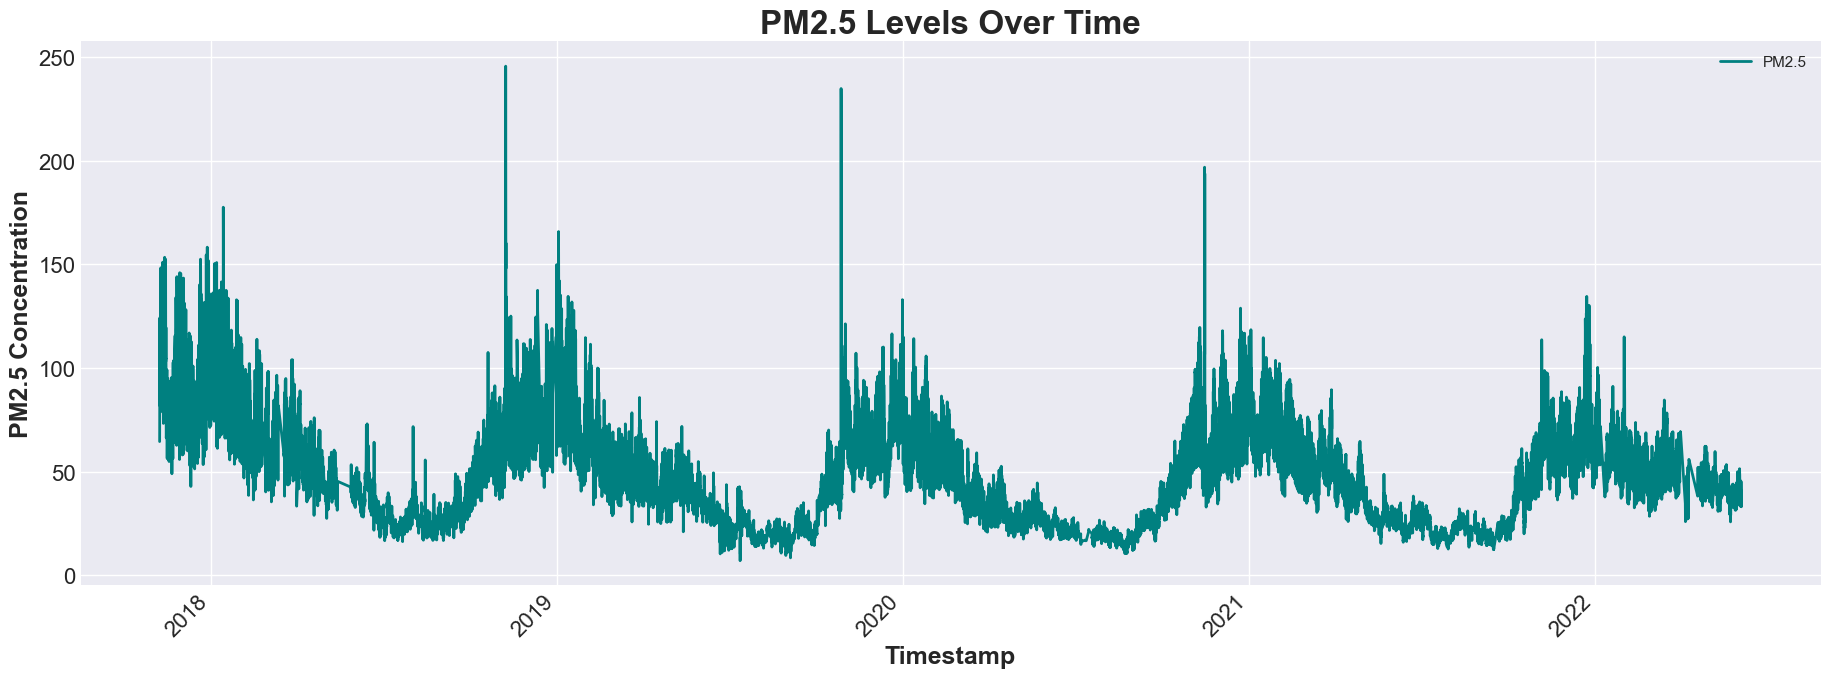

In [107]:
# Applying a style
plt.style.use('seaborn-darkgrid')

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
df.plot(x='Timestamp', y='PM2.5', ax=ax, linewidth=2, color='teal')

# Adding title and labels
ax.set_title('PM2.5 Levels Over Time', fontsize=24, fontweight='bold')
ax.set_xlabel('Timestamp', fontsize=18, fontweight='bold')
ax.set_ylabel('PM2.5 Concentration', fontsize=18, fontweight='bold')

# Customize tick parameters
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=16)


# Show the plot
plt.show()

<Axes: xlabel='Year'>

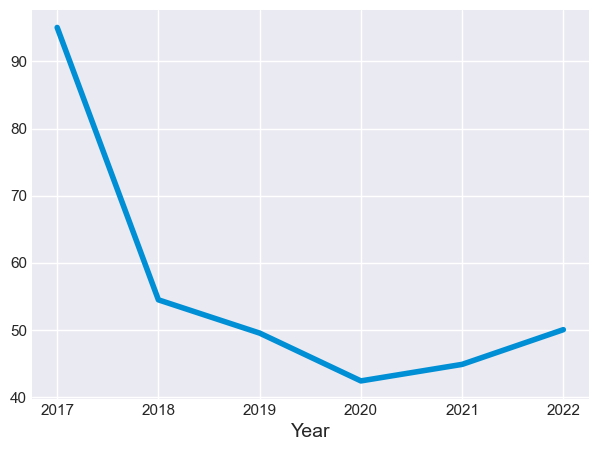

In [108]:
df.groupby('Year')['PM2.5'].mean().plot()

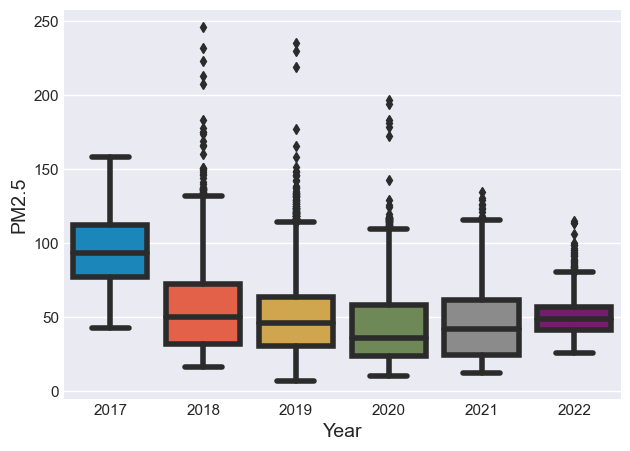

In [109]:
df_year=df.loc[:,['Year','PM2.5']]
sns.boxplot(x='Year', y='PM2.5',data=df_year)
sns.set(style="whitegrid")

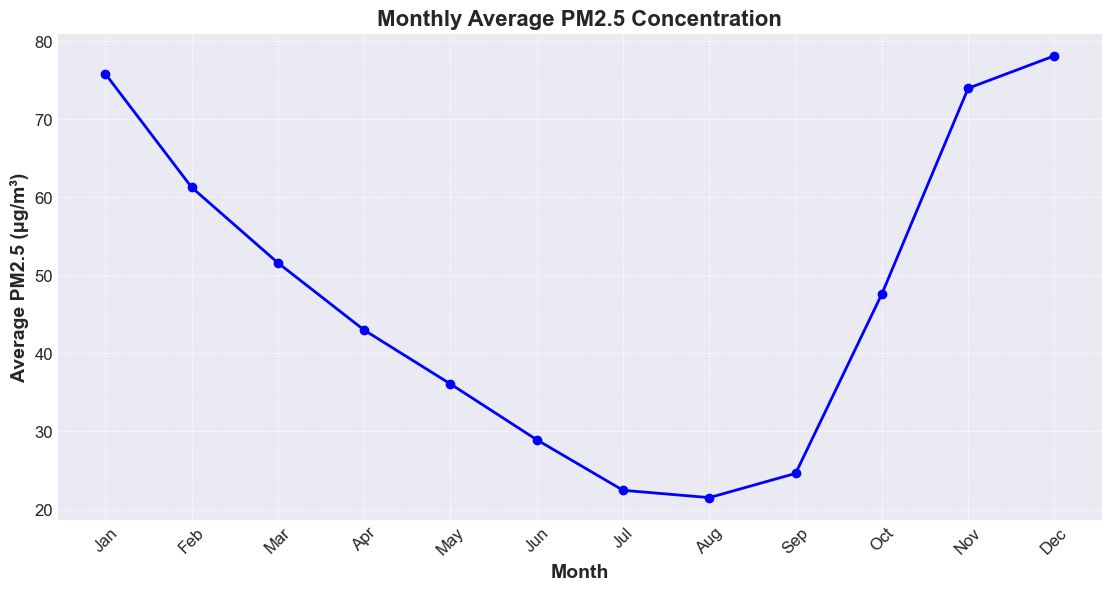

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

df['Month'] = df['Timestamp'].dt.month 

# Group by 'Month' and calculate the mean of 'PM2.5'
monthly_pm25 = df.groupby('Month')['PM2.5'].mean()

# Apply a style
plt.style.use('seaborn-darkgrid')  # This style offers a dark grid that is useful for data visualization

# Create the plot with customizations
fig, ax = plt.subplots(figsize=(12, 6))
monthly_pm25.plot(ax=ax, color='blue', linewidth=2, marker='o', linestyle='-')

# Adding grid, title, and labels with font customization
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Monthly Average PM2.5 Concentration', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Average PM2.5 (μg/m³)', fontsize=14, fontweight='bold')

# Customize tick parameters for better readability
ax.set_xticks(range(1, 13))  # Ensure ticks are set for each month
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


<Axes: xlabel='Month', ylabel='PM2.5'>

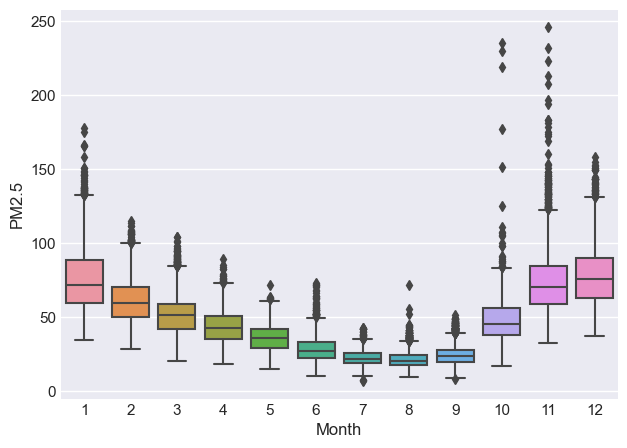

In [111]:
df_month=df.loc[:,['Month','PM2.5']]
sns.boxplot(x='Month', y='PM2.5',data=df_month)

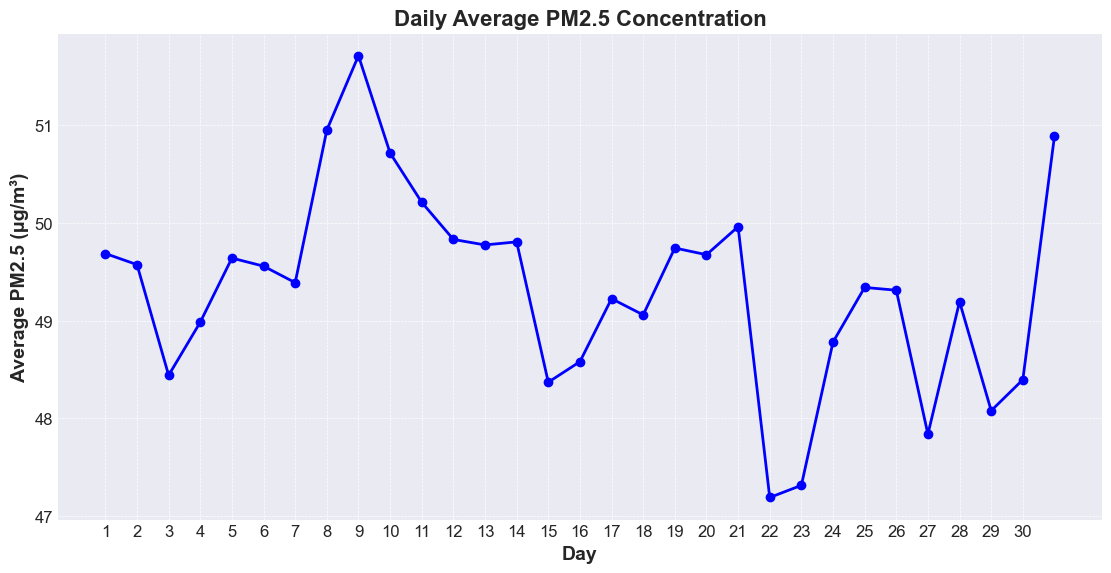

In [147]:
df['Day'] = df['Timestamp'].dt.day

# Group by 'Month' and calculate the mean of 'PM2.5'
monthly_pm25 = df.groupby('Day')['PM2.5'].mean()

# Apply a style
plt.style.use('seaborn-darkgrid')  # This style offers a dark grid that is useful for data visualization

# Create the plot with customizations
fig, ax = plt.subplots(figsize=(12, 6))
monthly_pm25.plot(ax=ax, color='blue', linewidth=2, marker='o', linestyle='-')

# Adding grid, title, and labels with font customization
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Daily Average PM2.5 Concentration', fontsize=16, fontweight='bold')
ax.set_xlabel('Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Average PM2.5 (μg/m³)', fontsize=14, fontweight='bold')

# Customize tick parameters for better readability
ax.set_xticks(range(1, 31))  # Ensure ticks are set for each month
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


<Axes: xlabel='Day', ylabel='PM2.5'>

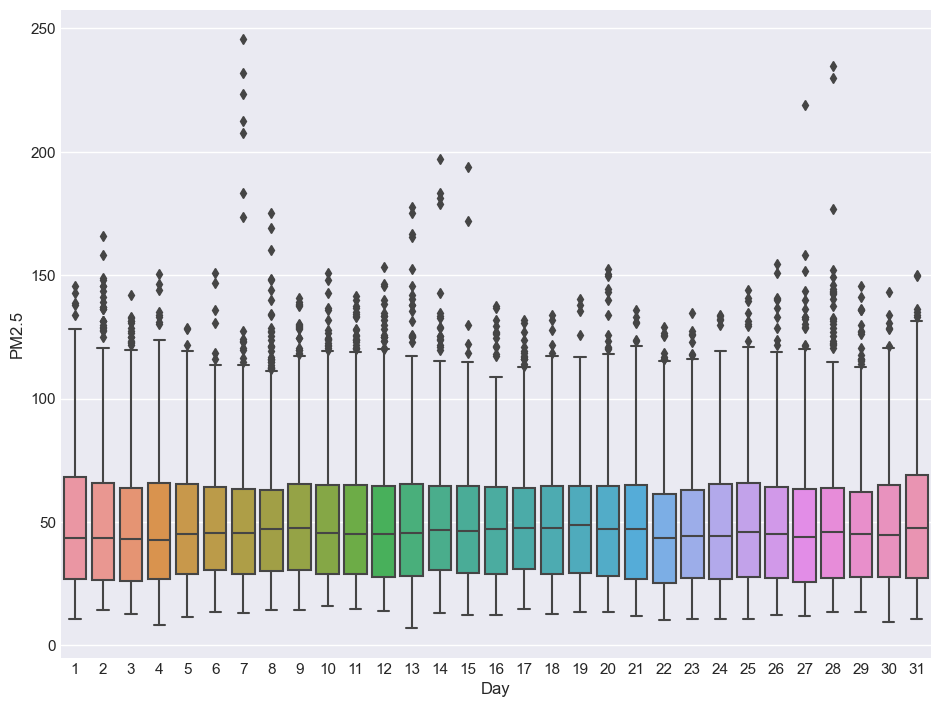

In [113]:
df_day=df.loc[:,['Day','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Day', y='PM2.5',data=df_day)

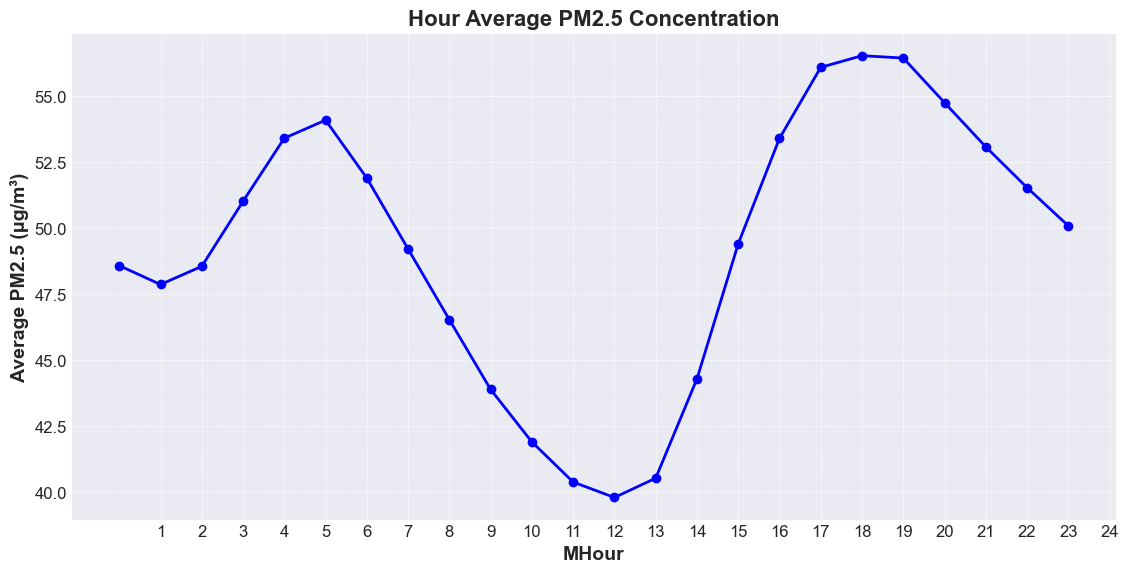

In [146]:
df['Hour'] = df['Timestamp'].dt.hour

# Group by 'Month' and calculate the mean of 'PM2.5'
monthly_pm25 = df.groupby('Hour')['PM2.5'].mean()

# Apply a style
plt.style.use('seaborn-darkgrid')  # This style offers a dark grid that is useful for data visualization

# Create the plot with customizations
fig, ax = plt.subplots(figsize=(12, 6))
monthly_pm25.plot(ax=ax, color='blue', linewidth=2, marker='o', linestyle='-')

# Adding grid, title, and labels with font customization
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Hour Average PM2.5 Concentration', fontsize=16, fontweight='bold')
ax.set_xlabel('MHour', fontsize=14, fontweight='bold')
ax.set_ylabel('Average PM2.5 (μg/m³)', fontsize=14, fontweight='bold')

# Customize tick parameters for better readability
ax.set_xticks(range(1, 25))  # Ensure ticks are set for each month
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()

<Axes: xlabel='Hour', ylabel='PM2.5'>

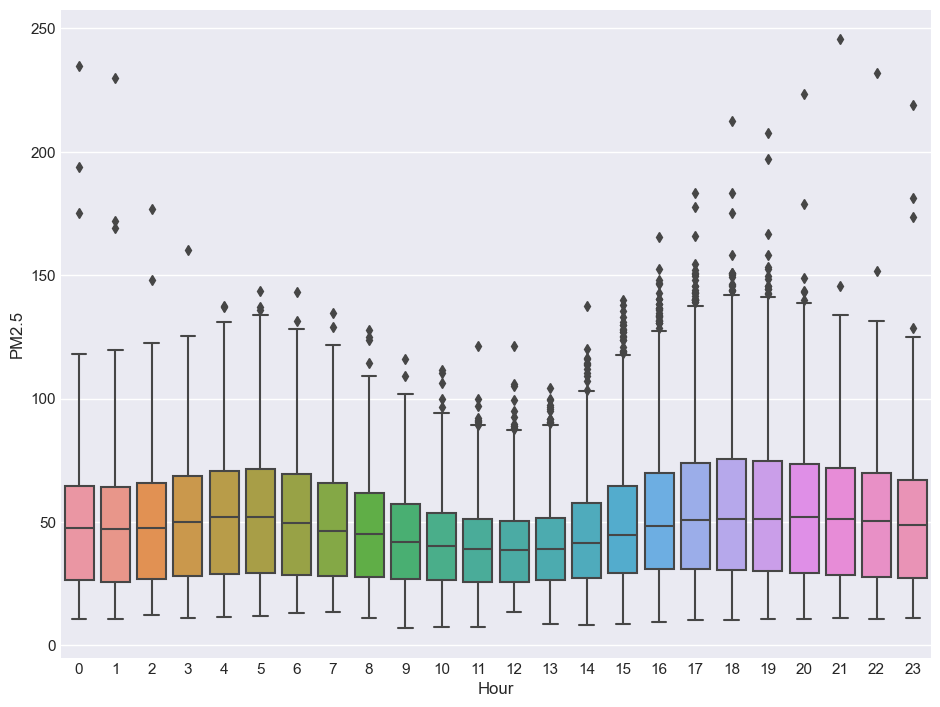

In [115]:
df_hour=df.loc[:,['Hour','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Hour', y='PM2.5',data=df_hour)

In [116]:
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date

,PM2.5
Date,
2017-11-07,99.805833
2017-11-08,110.979565
2017-11-09,114.915833
2017-11-10,119.404091
2017-11-11,109.267273
...,...
2022-05-31,41.465417
2022-06-01,41.645833
2022-06-02,42.255417


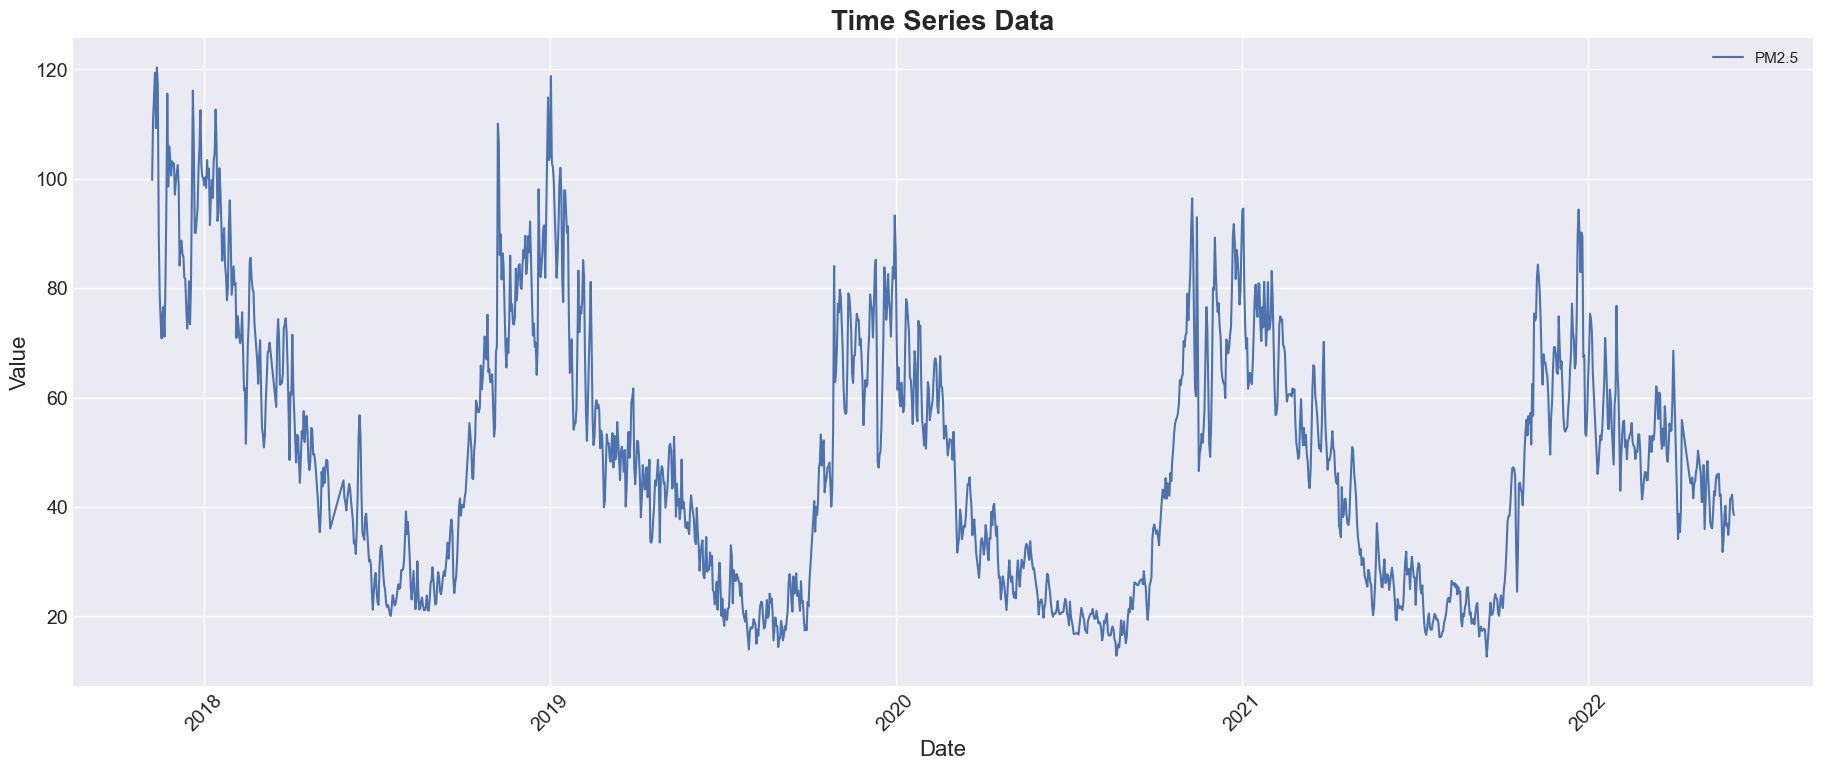

In [117]:
# Plotting the DataFrame with a specified figure size
df_date.plot(figsize=(20, 8))

# Adding enhancements
plt.title('Time Series Data', fontsize=20, fontweight='bold')  # Set a title for the plot
plt.xlabel('Date', fontsize=16)  # Label for the x-axis
plt.ylabel('Value', fontsize=16)  # Label for the y-axis
plt.grid(True)  # Enable grid to improve readability
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tick_params(axis='both', which='major', labelsize=14)  # Adjust the size of the tick labels

# Show the plot
plt.show()

# LSTM Model Building

In [118]:
# Array of data
data = df_date.values

# Calculate the length of the training data as 80% of the total dataset
length_of_training_data = math.ceil(len(data) * 0.8)

# Display the calculated length of the training data
length_of_training_data


1293

In [119]:
# Import the MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler, specifying the range of scaling from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the dataset and transform it
normalized_data = scaler.fit_transform(data)

# Output the normalized data
normalized_data

array([[0.80924161],
       [0.91297267],
       [0.94951492],
       ...,
       [0.27497376],
       [0.24870153],
       [0.24014526]])

In [120]:
# Assigning the first portion of the scaled data for training based on the calculated length
train_data = normalized_data[0:length_of_training_data, :]

# Initializing lists for the features and labels of the training data
x_train = []
y_train = []

# Set the number of previous data points to use for prediction
window_size = 60

# Loop through the training data starting from the window size
for i in range(window_size, len(train_data)):
    # Append a slice of data from (i-window_size) to i as features
    x_train.append(train_data[i-window_size:i, 0])
    # Append the data at position i as the label
    y_train.append(train_data[i, 0])

In [121]:
import numpy as np
# Convert lists x_train and y_train into numpy arrays
x_train = np.array(x_train)
y_train= np.array(y_train)

# Reshape x_train_array to be 3-dimensional as required by many deep learning frameworks
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Display the new shape of the x_train data
x_train.shape


(1233, 60, 1)

***Model Training and Prediction***

In [122]:
# Initialize a Sequential model
neural_network = Sequential()

# Add a first LSTM layer with 50 units, setting it to return sequences for stacking
neural_network.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# Add a second LSTM layer with 50 units, not returning sequences to prepare for the dense layers
neural_network.add(LSTM(50))

# Add a dense layer with 25 units
neural_network.add(Dense(25))

# Add the output dense layer with 1 unit
neural_network.add(Dense(1))


In [123]:
# Compile the neural network model
# Set 'adam' as the optimization algorithm, which is effective for various problems
# Use 'mean_squared_error' as the loss function, suitable for regression tasks
neural_network.compile(optimizer='adam', loss='mean_squared_error')


In [124]:
# Fit the neural network to the training data
# Use a batch size of 1 for fine-grained update control per training example
# Run the training for 1 epoch as a brief initial test of setup effectiveness
neural_network.fit(x_train, y_train, batch_size=1, epochs=1)


1233/1233 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - loss: 0.0092


In [125]:
# Select the portion of the scaled data for testing, starting from 60 days before the training data ends
test_data_segment = normalized_data[length_of_training_data - 60:, :]

# Initialize lists to store the sequences for testing
x_test = []

# The actual outputs we are trying to predict, taken from the original dataset
y_test = data[length_of_training_data:, :]

# Loop through the test data to create sequences of past 60 days' data points
window_size = 60  # consistent use of the variable 'num' defined earlier as window size
for i in range(window_size, len(test_data_segment)):
    x_test.append(test_data_segment[i - window_size:i, 0])  # extract sequences

# Convert the list to a numpy array for model compatibility
x_test = np.array(x_test)

# Reshape the data to fit the model input, adding the third dimension for features
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [126]:
# Make predictions using the trained model
predictions = neural_network.predict(x_test)

# Assuming 'sc' is an instance of MinMaxScaler used to scale the data initially
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


***Evaluation***

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predictions have already been inverse transformed if needed
# predictions = sc.inverse_transform(neural_network.predict(x_test))

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)



Mean Squared Error (MSE): 39.072328904834855
Root Mean Squared Error (RMSE): 6.250786262930037
Mean Absolute Error (MAE): 4.625997376597304
R-squared: 0.884352882461457


In [128]:
train = df_date[:length_of_training_data]
valid = df_date[length_of_training_data:]
valid["Predictions"] = predictions
valid

,PM2.5,Predictions
Date,,
2021-06-28,28.667917,29.673986
2021-06-29,30.903750,29.816351
2021-06-30,29.017917,30.836433
2021-07-01,27.166667,31.222536
2021-07-02,27.132917,30.852337
...,...,...
2022-05-31,41.465417,39.916500
2022-06-01,41.645833,41.295475
2022-06-02,42.255417,42.519123


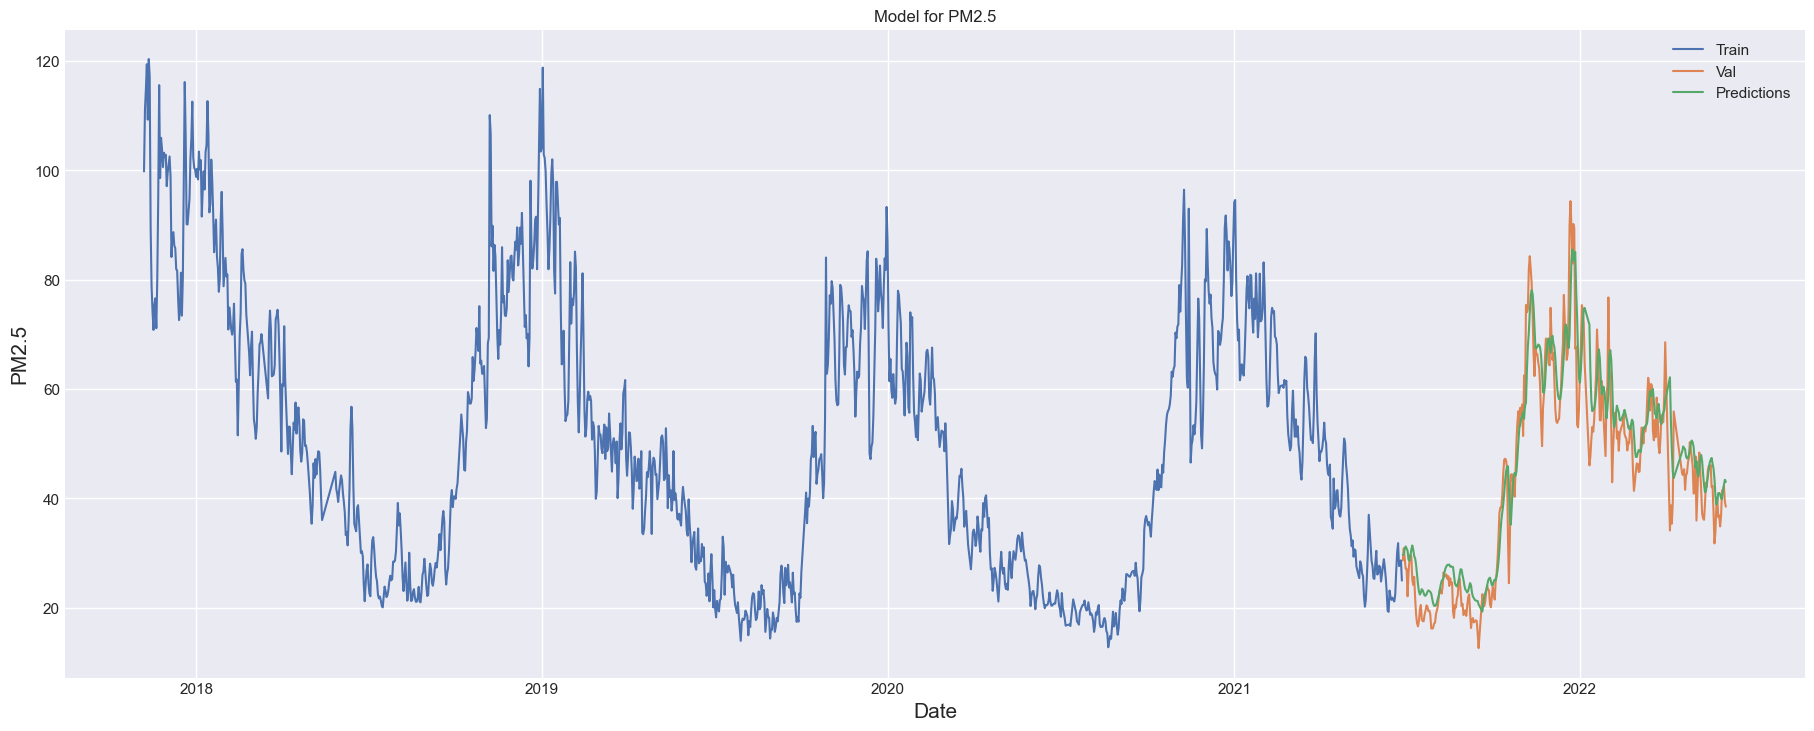

In [129]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[df_date.columns])
plt.plot(valid['PM2.5'])
plt.plot(valid["Predictions"])
plt.legend(["Train","Val","Predictions"])

In [154]:
import pandas as pd

# Assume 'last_date' is the last date in your dataset
last_date = pd.to_datetime('2022-06-04')  # replace with your actual last date

# Generate future dates, e.g., for the next 30 days
future_dates = pd.date_range(start=last_date, periods=366, freq='D')  # 'D' for daily frequency

# Optionally, create a DataFrame for these dates if your model expects a DataFrame input
future_df = pd.DataFrame(future_dates, columns=['Timestamp'])


In [158]:
predictions_reshaped = predictions.reshape(-1, 1)
predictions_scaled = scaler.transform(predictions_reshaped)

# Prepare sequences for LSTM input, assuming your model takes the last 'n' days to predict the next day
def create_sequences(input_data, n_steps):
    X = []
    for i in range(len(input_data) - n_steps):
        X.append(input_data[i:i+n_steps])
    return np.array(X)

n_steps = 10  # number of steps your model was trained on
X_future = create_sequences(predictions_scaled, n_steps)


In [159]:
# Assuming 'model' is your trained LSTM model
future_predictions = neural_network.predict(X_future)

# If the output is scaled (common with LSTM regression tasks), inverse the scaling
predicted_pm25_levels = scaler.inverse_transform(future_predictions.reshape(-1, 1))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


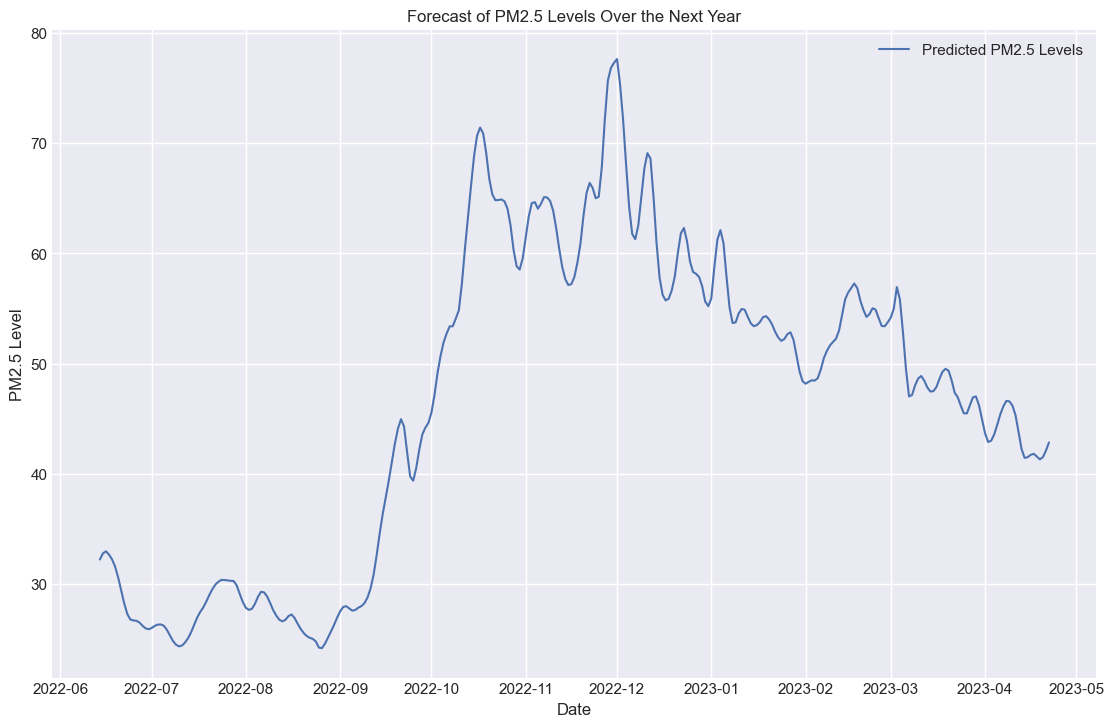

In [165]:
import matplotlib.pyplot as plt

# We know:
# - future_dates has 366 days (one extra because of the leap year adjustment or similar reason).
# - predicted_pm25_levels has 313 days worth of predictions.

# Given 'n_steps' is the number of past observations used for each prediction step:
n_steps = 10  # or the actual number used in your model setup

# Adjust the future_dates to match the length of the predictions:
# We start plotting from 'n_steps' days into the future_dates, ensuring we align with where the first prediction starts.
adjusted_future_dates = future_dates[n_steps:n_steps + len(predicted_pm25_levels)]

# Ensure predicted_pm25_levels is a flat array for plotting:
predicted_pm25_levels = predicted_pm25_levels.flatten()

# Plotting the data:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_future_dates, predicted_pm25_levels, label='Predicted PM2.5 Levels')
plt.title('Forecast of PM2.5 Levels Over the Next Year')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()


In [177]:
print(df_date.head())

                 PM2.5
Date                  
2017-11-07   99.805833
2017-11-08  110.979565
2017-11-09  114.915833
2017-11-10  119.404091
2017-11-11  109.267273


In [178]:
# Now creating the DataFrame for predicted data
predicted_data = pd.DataFrame({
    'Date': adjusted_future_dates,
    'PM2.5': predicted_pm25_levels.flatten()  # Ensure this is flattened
})

# Combine the historical and predicted data
full_data = pd.concat([historical_data, df_date], ignore_index=True)
full_data

,Date,PM2.5
0,2017-11-07,64.510000
1,2017-11-07,69.950000
2,2017-11-07,92.790000
3,2017-11-07,109.660000
4,2017-11-07,116.500000
...,...,...
37803,NaN,41.465417
37804,NaN,41.645833
37805,NaN,42.255417
37806,NaN,39.425417


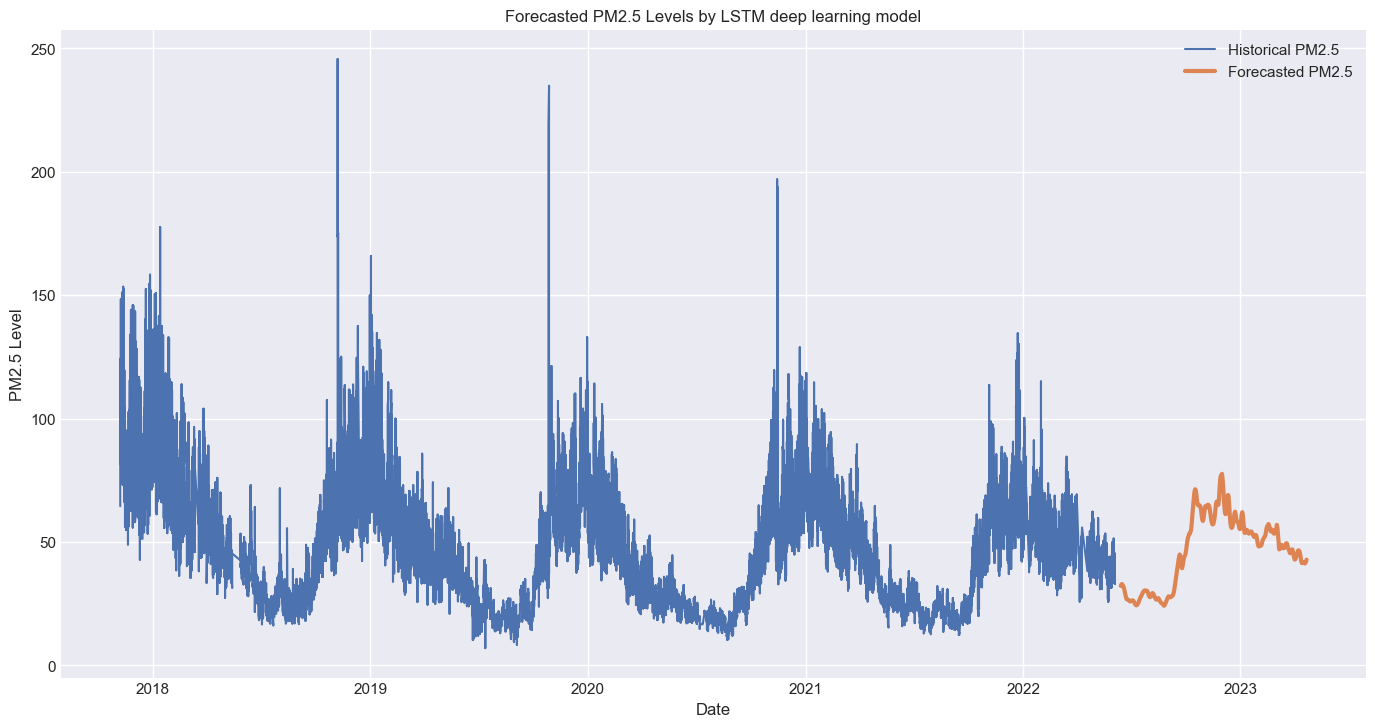

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Plot historical data
plt.plot(historical_data['Date'], historical_data['PM2.5'], label='Historical PM2.5')
# Plot predicted data
plt.plot(predicted_data['Date'], predicted_data['PM2.5'], label='Forecasted PM2.5',linewidth=3)

plt.title('Forecasted PM2.5 Levels by LSTM deep learning model')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()


# Prophet for Forecasting

In [131]:
!pip install prophet


In [136]:
from prophet import Prophet


In [138]:
# Creating dataframe for propheting
prophet_df = df.rename(columns={'Date':'ds', 'PM2.5':'y'})
prophet_df

,Timestamp,Year,Month,Day,Hour,y,ds,Predictions,PM2.5_Mean
0,2017-11-07 12:00:00,2017,11,7,12,64.51,2017-11-07,NaN,49.308429
1,2017-11-07 13:00:00,2017,11,7,13,69.95,2017-11-07,NaN,49.308429
2,2017-11-07 14:00:00,2017,11,7,14,92.79,2017-11-07,NaN,49.308429
3,2017-11-07 15:00:00,2017,11,7,15,109.66,2017-11-07,NaN,49.308429
4,2017-11-07 16:00:00,2017,11,7,16,116.50,2017-11-07,NaN,49.308429
...,...,...,...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89,2022-06-04,NaN,49.308429
36188,2022-06-04 12:00:00,2022,6,4,12,33.83,2022-06-04,NaN,49.308429
36189,2022-06-04 13:00:00,2022,6,4,13,33.05,2022-06-04,NaN,49.308429
36190,2022-06-04 14:00:00,2022,6,4,14,35.29,2022-06-04,NaN,49.308429


In [139]:
# Forcasting into the future
m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


11:58:36 - cmdstanpy - INFO - Chain [1] start processing
11:58:56 - cmdstanpy - INFO - Chain [1] done processing


(array([17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

<Figure size 1400x700 with 0 Axes>

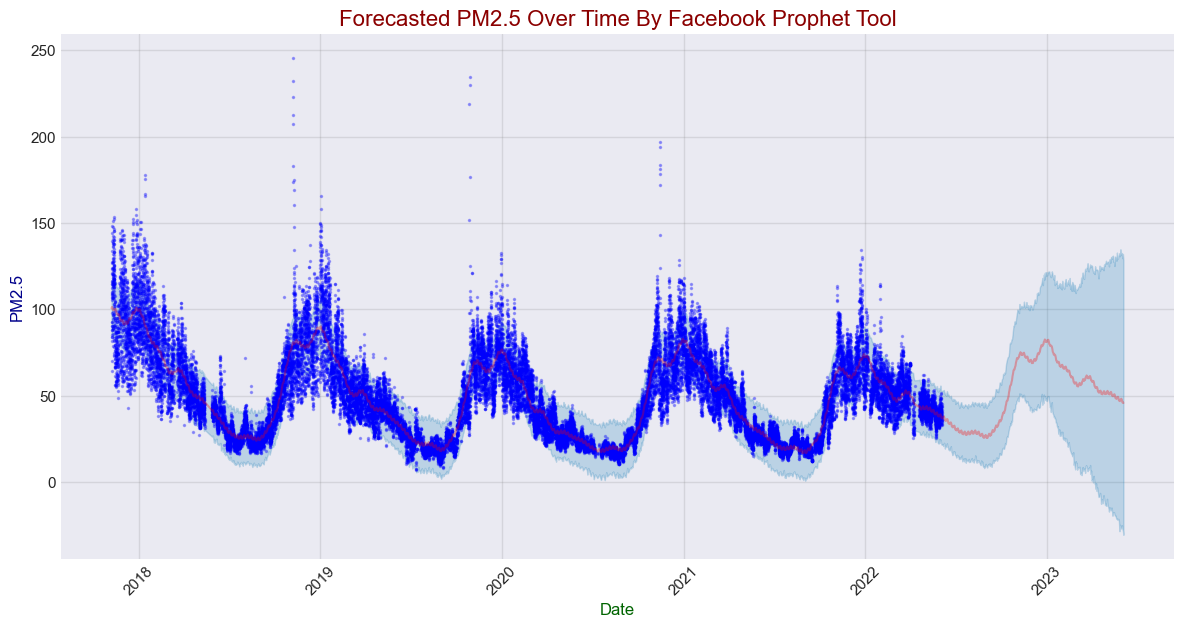

In [182]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Increase the default figure size for better clarity
plt.figure(figsize=(14, 7))

# Plotting the forecast with custom colors
fig = m.plot(forecast, xlabel='Date', ylabel='PM2.5', figsize=(12, 6))

# Get the current axis of the plot
ax = fig.gca()

# Set the colors for the forecast line and the confidence interval
# Assuming the first line (get_lines()[0]) refers to the historical data points
for line in ax.get_lines():
    line.set_alpha(0.3)  # Making lines more transparent for clarity
ax.get_lines()[0].set_color('blue')  # Changes the color of the historical data points
ax.get_lines()[0].set_markersize(3)  # Makes the historical data points smaller
ax.get_lines()[1].set_color('red')   # Changes the color of the forecast line

# Set title and labels with custom colors
ax.set_title('Forecasted PM2.5 Over Time By Facebook Prophet Tool', fontsize=16, color='darkred')
ax.set_xlabel('Date', fontsize=12, color='darkgreen')
ax.set_ylabel('PM2.5', fontsize=12, color='darkblue')

# Customize date formatting on the x-axis
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)
